In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
!pip install scikit-learn

In [10]:
!pip install SVM

In [11]:
!pip install XGBoost

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score

In [13]:
!pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [15]:
from xgboost import XGBClassifier

# Reading CSV file-

In [16]:
data=pd.read_csv('/home/aayush/Downloads/heart stroke/dataset for project final/kaggle healthcare-dataset-stroke-data.csv')

In [17]:
# checking the first 10 tuples-

In [18]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [19]:
# info about dataset-

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [21]:
# checking statistical features of the data-

In [22]:
data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Data Analysis (EDA)-

# 1. id

In [23]:
# id is nothing but a unique number assigned to every patient to keep track of them and making them unique. 
# There is no need for id it’s completely useless so I will remove it.

In [24]:
data.drop("id",inplace=True,axis=1)

In [25]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 2. gender

In [26]:
# This attribute states the gender of the patient. Let’s see how does Gender affects occurrence of stroke and
# Gender wise comparison of stroke rate.

In [27]:
print('Unique values\n',data['gender'].unique())

Unique values
 ['Male' 'Female' 'Other']


In [28]:
print('Value Counts\n',data['gender'].value_counts())

Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

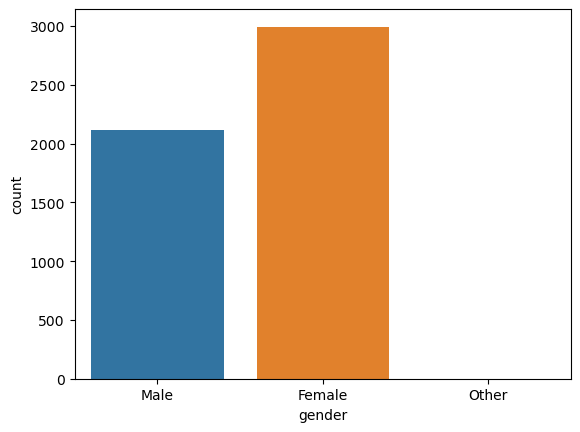

In [29]:
sns.countplot(data=data,x='gender')

In [30]:
# plot to analyze how gender will affect chances of stroke-

<AxesSubplot:xlabel='gender', ylabel='count'>

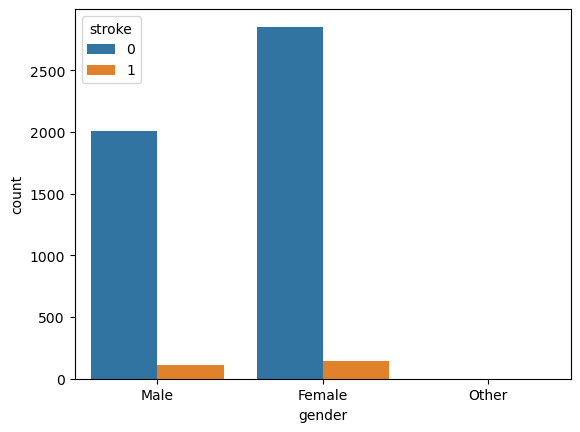

In [31]:
sns.countplot(data=data,x='gender',hue='stroke')

In [32]:
# The dataset is imbalanced. I can see there is not much difference between stroke rate concerning gender i.e.,
# stroke rate is not much dependent on the gender of the patient.

# 3. age

In [33]:
# Age is one of the very crucial factors. I will analyze the data and see how much actual impact it has.

In [34]:
data['age'].nunique()

104

In [35]:
# distribution plot of the variable age-

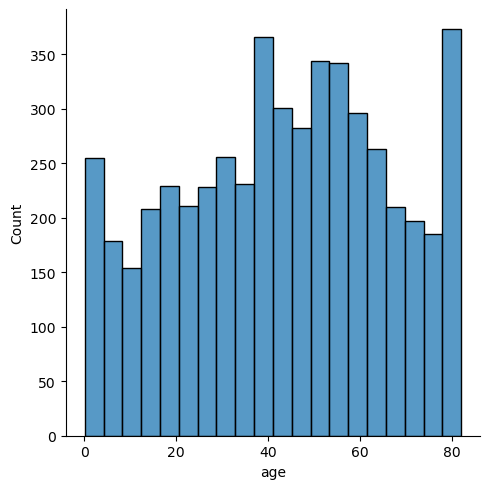

In [36]:
sns.displot(data['age'])

In [37]:
# a boxplot of the variable age with respect of target attribute stroke to check relation-

<AxesSubplot:xlabel='stroke', ylabel='age'>

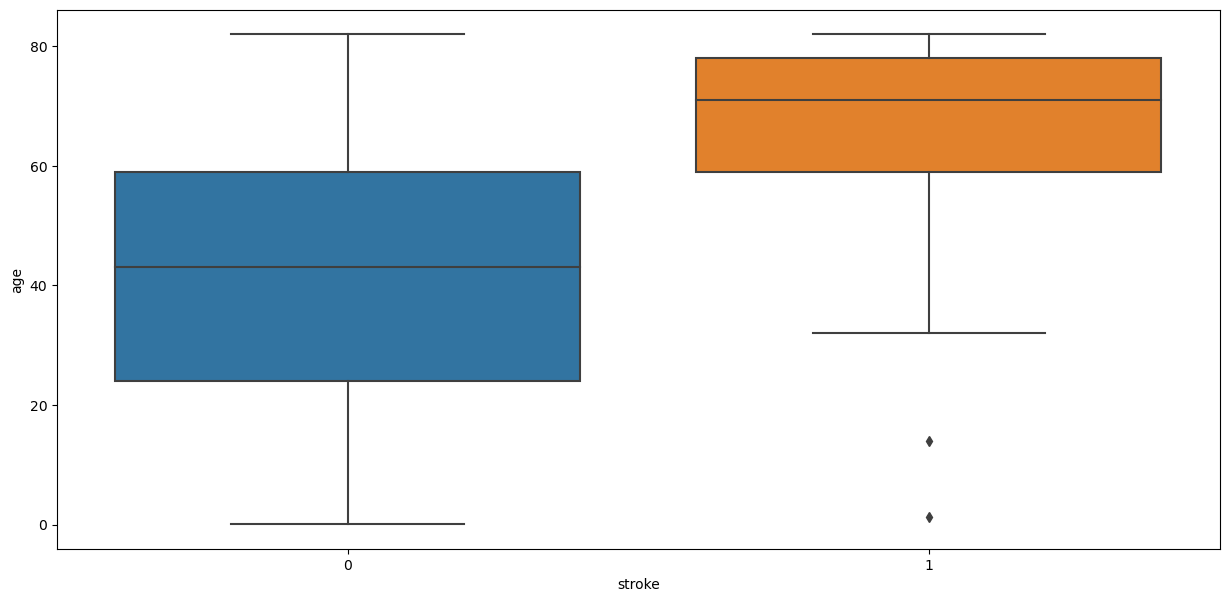

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')

In [39]:
# I can see that People aged more than 60 years tend to have a stroke. 
# Some outliers can be seen as people below age 20 are having a stroke it might be possible that it’s valid data as
# stroke also depends on our eating and living habits. 
# Another observation is people not having strokes also consist of people age > 60 years.

# 4. hypertension

In [40]:
# Hypertension is a condition when a person has high blood pressure. Hypertension might result in a stroke.

In [41]:
print('Unique values\n',data['hypertension'].unique())

Unique values
 [0 1]


In [42]:
# 0 for a patient not having hypertension and 1 for a petient having hypertension.

In [43]:
print('Value Counts\n',data['hypertension'].value_counts())

Value Counts
 0    4612
1     498
Name: hypertension, dtype: int64


In [44]:
# a count plot of the variable hypertension-

<AxesSubplot:xlabel='hypertension', ylabel='count'>

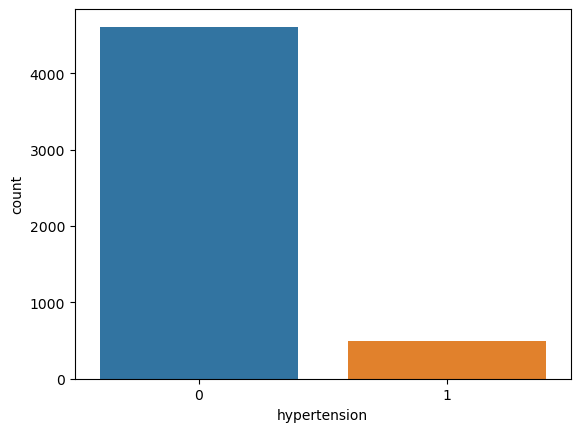

In [45]:
sns.countplot(data=data,x='hypertension')

In [46]:
# Plot to check the relation between hypertension and stroke-

<AxesSubplot:xlabel='hypertension', ylabel='count'>

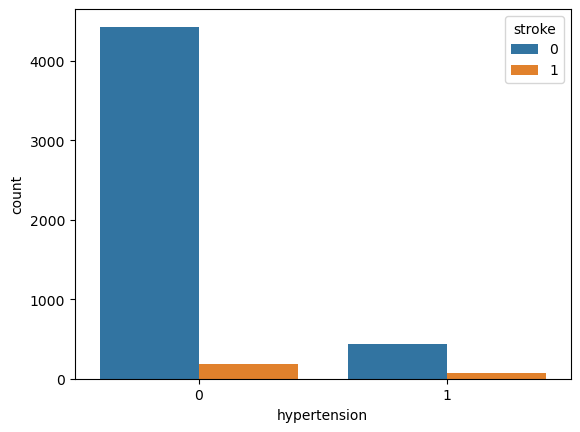

In [47]:
sns.countplot(data=data,x='hypertension',hue='stroke')

In [48]:
# hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. 
# Based on our data picture is not that clear for hypertension. 
# It has quite little data on patients having hypertension.

# 5. heart_disease

In [49]:
# generally, People having heart disease tends to have a higher risk of having a stroke

In [50]:
print('Unique Value\n',data['heart_disease'].unique())

Unique Value
 [1 0]


In [51]:
print('Value Counts\n',data['heart_disease'].value_counts())

Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


In [52]:
# a count plot of the variable heart_disease-

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

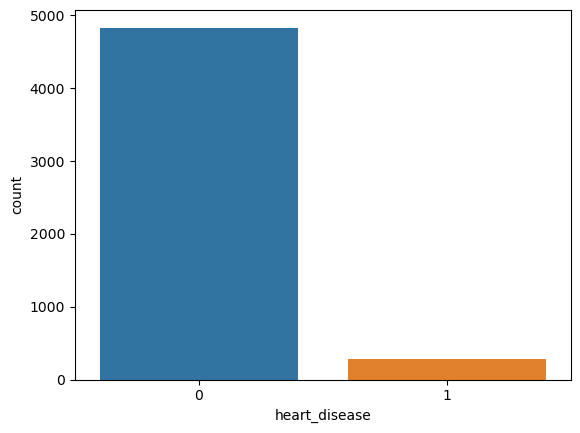

In [53]:
sns.countplot(data=data,x='heart_disease')

In [54]:
# Plot to check the relation between heart_disease and stroke-

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

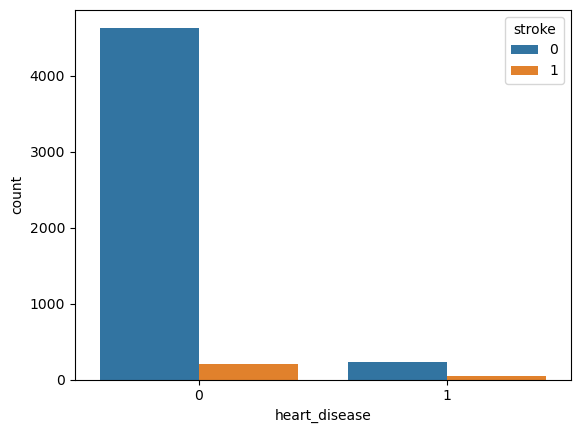

In [55]:
sns.countplot(data=data,x='heart_disease',hue='stroke')

In [56]:
# Because of the imbalanced dataset, it’s a little bit difficult to get an idea. 
# But as per this plot, I can say that heart disease is not affecting Stroke.

# 6. ever_married

In [57]:
# This attribute will tell me whether or not the patient was ever married. 
# I will try to analyse how will it affect the chances of having a stroke.

In [58]:
print('Unique Values\n',data['ever_married'].unique())

Unique Values
 ['Yes' 'No']


In [59]:
print('Value Counts\n',data['ever_married'].value_counts())

Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


In [60]:
# a count plot of the variable ever_married-

<AxesSubplot:xlabel='ever_married', ylabel='count'>

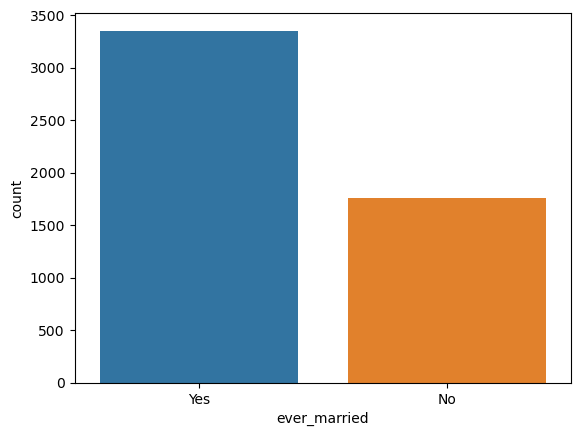

In [61]:
sns.countplot(data=data,x='ever_married')

In [62]:
# Plot to check the relation between ever_married and stroke-

<AxesSubplot:xlabel='ever_married', ylabel='count'>

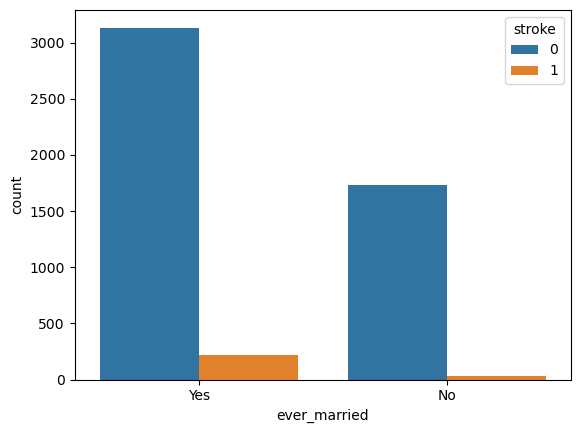

In [63]:
sns.countplot(data=data,x='ever_married',hue='stroke')

In [64]:
# I observe that people who are married have higher chances of stroke.

# 7. work_type

In [65]:
# This attribute contains data about what kind of work does the patient. 
# Different kinds of work have different kinds of problems and challenges which can be the possible reason for 
# excitement, thrill, stress, etc. 
#Stress is never good for health, let’s see how this variable can affect the chances of having a stroke.

In [66]:
print('Unique Value\n',data['work_type'].unique())

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


In [67]:
print('Value Counts\n',data['work_type'].value_counts())

Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [68]:
# a count plot of the variable work_type-

<AxesSubplot:xlabel='work_type', ylabel='count'>

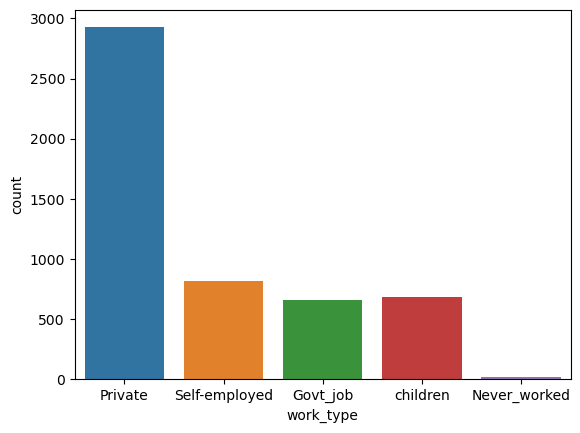

In [69]:
sns.countplot(data=data,x='work_type')

In [70]:
# Plot to check the relation between work_type and stroke-

<AxesSubplot:xlabel='work_type', ylabel='count'>

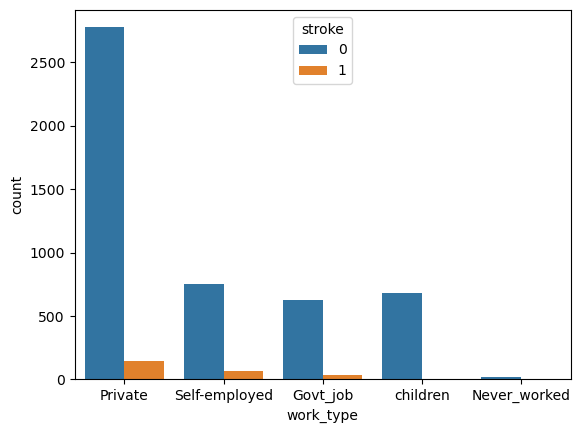

In [71]:
sns.countplot(data=data,x='work_type',hue='stroke')

In [72]:
# I observe that People working in the Private sector have a higher risk of getting a stroke and
# people who have never worked have a very less stroke rate.

# 8. Residence_type-

In [73]:
# This attribute tells us whether what kind of residence the patient is. It can be Urban or Rural.

In [74]:
print('Unique Values\n',data['Residence_type'].unique())

Unique Values
 ['Urban' 'Rural']


In [75]:
print("Value Counts\n",data['Residence_type'].value_counts())

Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [76]:
# a count plot of the variable Residence_type-

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

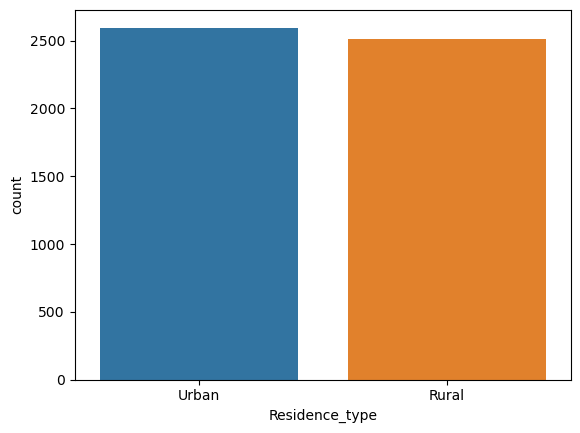

In [77]:
sns.countplot(data=data,x='Residence_type')

In [78]:
# Plot to check the relation between Residence_type and stroke-

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

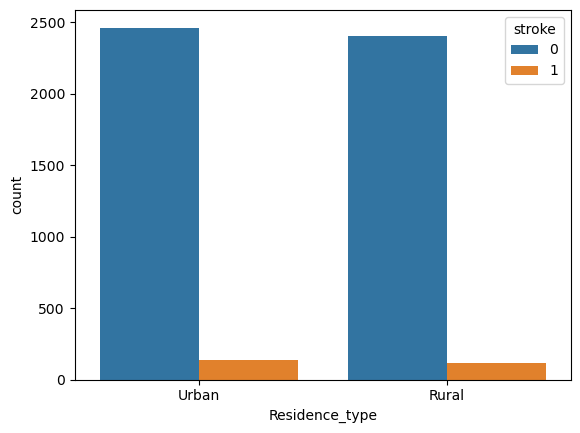

In [79]:
sns.countplot(data=data,x='Residence_type',hue='stroke')

In [80]:
# Residence_type has no such effect on stroke. As we can see there not much difference in both attribute values. 

# 9. avg_glucose_level

In [81]:
data['avg_glucose_level'].nunique()


3979

In [82]:
print("Value Counts\n",data['avg_glucose_level'].value_counts())

Value Counts
 93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


In [83]:
# distribution plot of the variable avg_glucose_level-

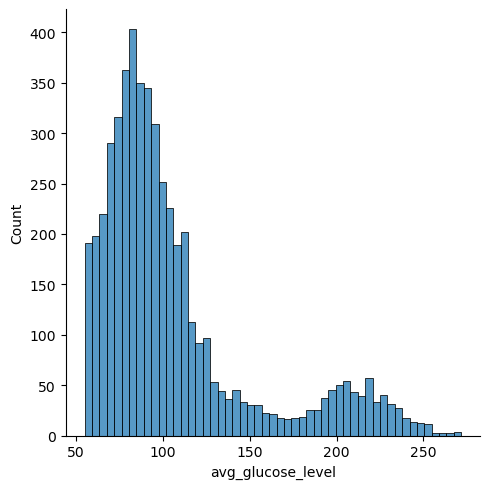

In [84]:
sns.displot(data['avg_glucose_level'])

In [85]:
# a boxplot of the variable avg_glucose_level with respect of target attribute stroke to check relation-

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

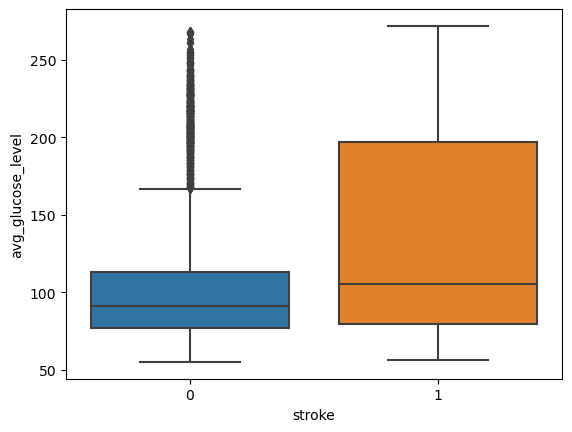

In [86]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')


In [87]:
# I observe from the above graph that people having stroke have an average glucose level of more than 100. 
# There are some obvious outliers in patients who have no stroke but there are some chances of this being genuine records 
# because dealing with outliers has a different approach when it comes to healthcare data.

# 10. bmi

In [88]:
# Body Mass Index is a measure of body fat based on height and weight that applies to adult men and women. 
# I will analyse how does it affect the chances of having a stroke.

In [89]:
data['bmi'].nunique()

418

In [90]:
print("Value Counts\n",data['bmi'].value_counts())

Value Counts
 28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


In [91]:
# checking for null values in bmi-

In [92]:
data['bmi'].isna().sum()

201

In [93]:
# there are 201 null values in bmi, I will replace this with mean values of bmi.

In [94]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [95]:
data['bmi'].nunique()

419

In [96]:
# distribution plot of the variable bmi-

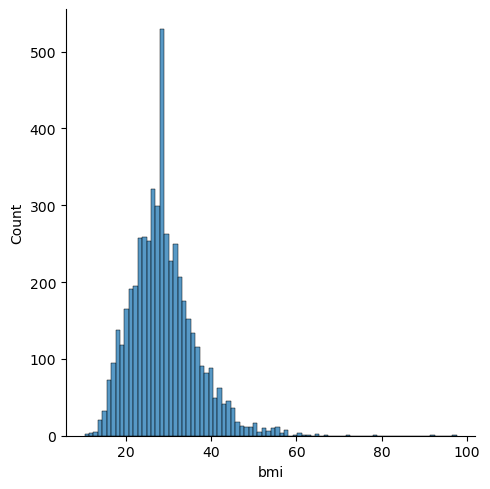

In [97]:
sns.displot(data['bmi'])

In [98]:
# a boxplot of the variable bmi with respect of target attribute stroke to check relation-

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

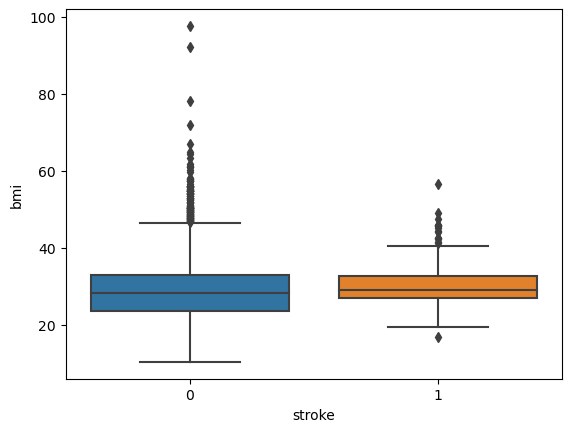

In [99]:
sns.boxplot(data=data,x='stroke',y='bmi')

In [100]:
# There is as such no prominent observation of how does BMI affects the chances of having a stroke.

# 11.Smoking Status

In [101]:
print('Unique Values\n',data['smoking_status'].unique())

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [102]:
print('Value Counts\n',data['smoking_status'].value_counts())

Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [103]:
# count plot for the variable smoking_status

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

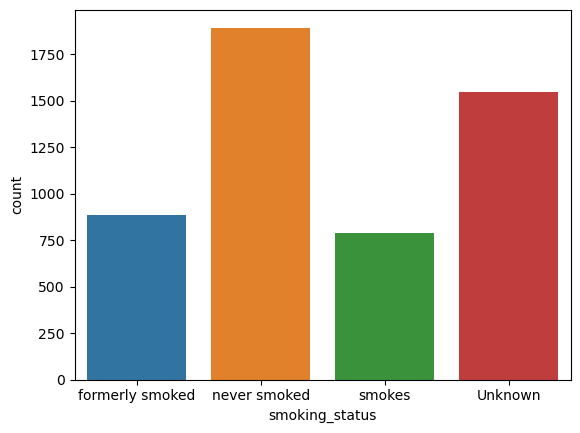

In [104]:
sns.countplot(data=data,x='smoking_status')

In [105]:
# Plot to check the relation between smoking_status and stroke-

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

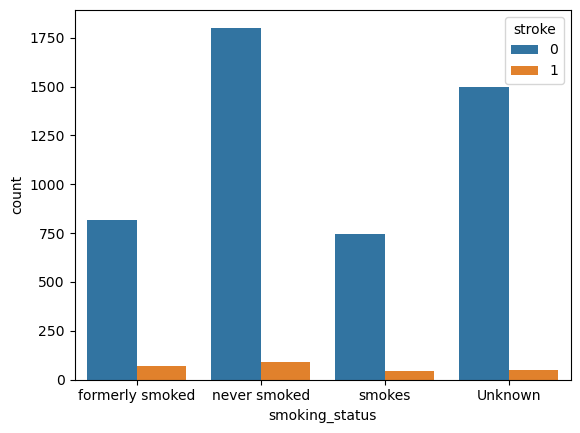

In [106]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

In [107]:
# As per these plots, I can see there is not much difference in the chances of stroke irrespective of smoking status.

# 12. Stroke(Target Variable)-

In [108]:
# This is The target variable, It will tell us whether the patient will have a stroke or not.

In [109]:
print('Unique Value\n',data['stroke'].unique())

Unique Value
 [1 0]


In [110]:
print('Value Counts\n',data['stroke'].value_counts())

Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

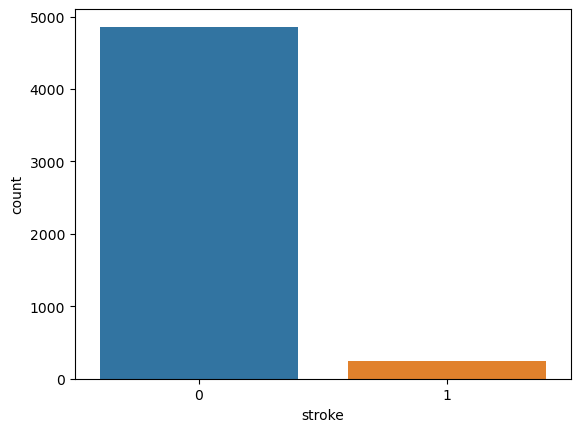

In [111]:
sns.countplot(data=data,x='stroke')

# Feature Engineering-

# 1. Label Encoding-

In [112]:
# The stroke dataset used is a mix of both categorical and numeric data and since ML algorithms understand data of 
# numeric nature I will encode the categorical data into numeric ones using Label Encoder. 
# Label Encoder is a technique that will convert categorical data into numeric data. 
# It takes value in ascending order and converts it into numeric data from 0 to n-1 i.e., 0,1,2,3....n-1.

In [113]:
# I will fetch the columns whose data type is object.

In [114]:
cols=data.select_dtypes(include=['object']).columns

In [115]:
print(cols)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [116]:
# Initializing the Label Encoder object-

In [117]:
le=LabelEncoder()

In [118]:
# Transfering categorical data into numeric encoding-

In [119]:
data[cols]=data[cols].apply(le.fit_transform)

In [120]:
print(data.head(10))

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237 

In [121]:
# I can see that the attributes having data of object/string data type has been converted to numeric data.

# 2. Correlation

<AxesSubplot:>

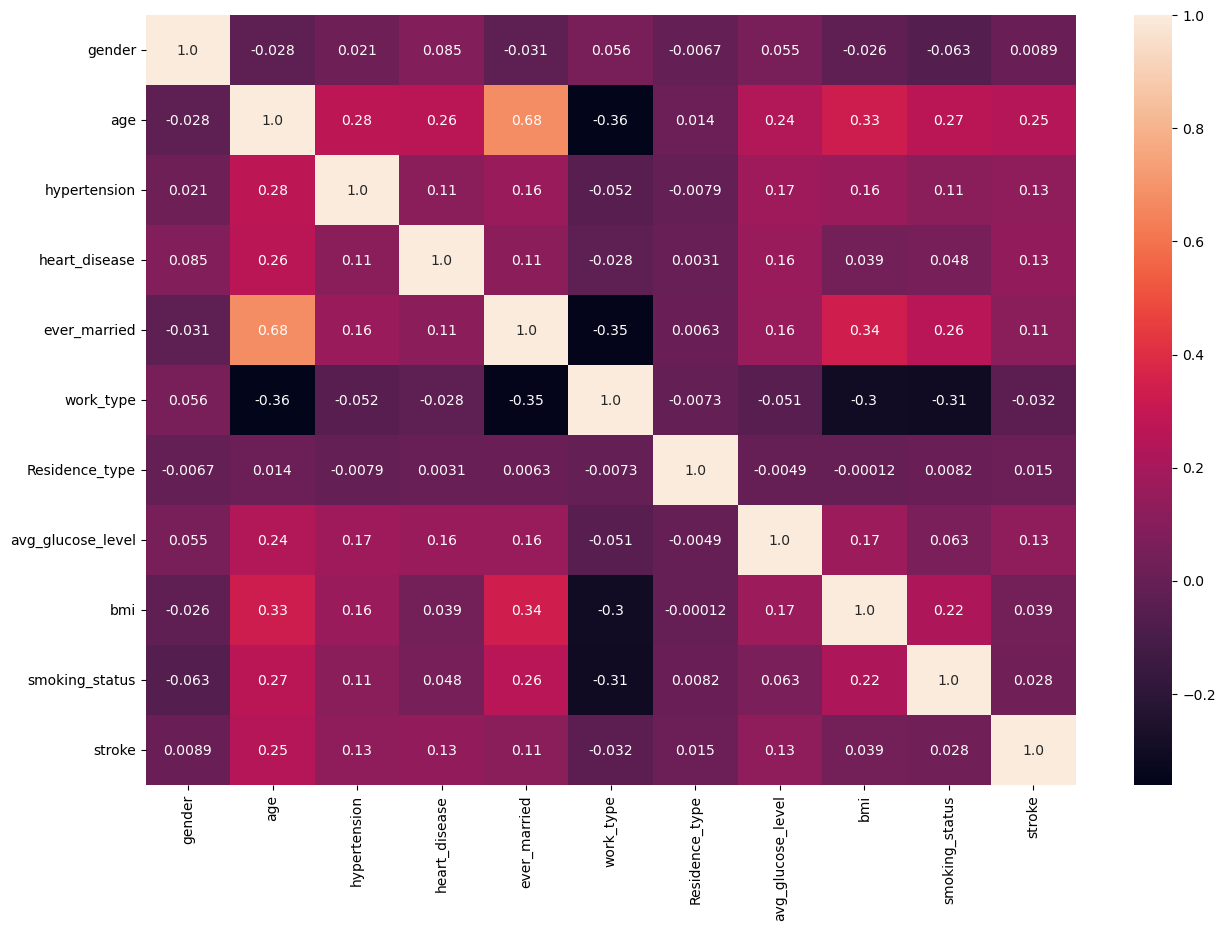

In [122]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [123]:
# I Observe that the Variables that are showing some effective correlation are:

# age, hypertension, heart_disease, ever_married, avg_glucose_level.

In [124]:
# With a ML approach, I will check the features using SelectKBest and F_Classif.

In [125]:
classifier = SelectKBest(score_func=f_classif,k=5)

In [126]:
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])

In [127]:
x=pd.DataFrame(fits.scores_)

In [128]:
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)

In [129]:
fscores = pd.concat([columns,x],axis=1)

In [130]:
fscores.columns = ['Attribute','Score']

In [131]:
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In [132]:
# In the above result, I can see that age is a highly correlated variable and then it gets decreasing. 
# I am keeping the threshold score as 50. Resulting in the same features we got in the heatmap.

In [133]:
cols=fscores[fscores['Score']>50]['Attribute']

In [134]:
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


# 3. Splitting Data-

In [135]:
X=data.drop('stroke',axis=1) 

In [136]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [137]:
Y=data['stroke'] 

In [138]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [141]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,55.0,0,0,0,3,0,67.10,31.400000,2
5085,0,72.0,0,0,1,2,1,83.89,33.100000,1
1593,1,31.0,0,0,1,2,1,71.31,25.800000,2
1324,0,80.0,0,0,1,0,1,84.86,28.893237,0
123,1,56.0,1,0,1,2,0,249.31,35.800000,2
...,...,...,...,...,...,...,...,...,...,...
4171,1,45.0,0,0,1,2,1,115.52,33.900000,1
599,0,59.0,1,0,1,2,1,204.86,30.800000,2
1361,0,59.0,0,0,1,2,1,89.96,28.100000,0
1547,1,59.0,0,1,1,3,0,194.98,30.400000,0


In [142]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [143]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [144]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

# 4. Normalisation of Data-

In [145]:
# In Normalization, I will scale down the varied data into a particular range

In [146]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
std=StandardScaler()

In [149]:
X_train_std=std.fit_transform(X_train)

In [150]:
X_test_std=std.transform(X_test)

In [151]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

# Model Creation using XGBoost-

In [152]:
# In the previous notebook,I have created 6 models namely- Logistic Regression, Random Forest Classifier, SVM, 
# Decison Tree, KNN and XGBoost.
# Out of which XGBClassifier model’s performance was best. Logistic Regression came second but it was a close call.
# So hereI am just gonna use XGBClassifier.

In [153]:
!pip install xgboost

In [154]:
from xgboost import XGBClassifier
xgc = XGBClassifier()

In [155]:
xgc.fit(X_train_std, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [156]:
Y_pred_xgc= xgc.predict(X_test_std)

In [157]:
Y_pred_xgc

array([0, 0, 0, ..., 0, 1, 0])

In [158]:
ac_xgc= accuracy_score(Y_test, Y_pred_xgc)

In [159]:
ac_xgc

0.9461839530332681

In [160]:
# 94.61% accuracy in XGB.

In [161]:
# I will use this model for web deployment.

# Checking the accuracy of the model by running it on a sample of 100 tuples-

In [162]:
data_example=pd.read_csv('/home/aayush/Downloads/heart stroke/dataset for project final/100example.csv')

In [163]:
data_example

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2458,Female,78,0,0,Yes,Private,Rural,235.63,32.3,never smoked,1
96,35512,Female,70,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
97,56841,Male,58,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
98,8154,Male,57,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


In [164]:
data_example.drop("id",inplace=True,axis=1)

In [165]:
data_example.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,100.000000,100.000000,100.00000,100.000000,83.000000,100.0
mean,67.280000,0.270000,0.21000,134.580100,30.104819,1.0
std,11.679283,0.446196,0.40936,62.042053,6.250559,0.0
min,39.000000,0.000000,0.00000,58.090000,20.200000,1.0
25%,58.000000,0.000000,0.00000,82.215000,26.250000,1.0
50%,69.000000,0.000000,0.00000,105.320000,28.900000,1.0
75%,78.000000,1.000000,0.00000,195.600000,32.650000,1.0
max,82.000000,1.000000,1.00000,252.720000,48.900000,1.0


In [166]:
# doing label encoding for the data_example-

In [167]:
cols_example=data_example.select_dtypes(include=['object']).columns

In [168]:
cols_example

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [169]:
le=LabelEncoder()

In [170]:
data_example[cols_example]=data_example[cols_example].apply(le.fit_transform)

In [171]:
print(data.head(100))

    gender   age  hypertension  heart_disease  ever_married  work_type  \
0        1  67.0             0              1             1          2   
1        0  61.0             0              0             1          3   
2        1  80.0             0              1             1          2   
3        0  49.0             0              0             1          2   
4        0  79.0             1              0             1          3   
..     ...   ...           ...            ...           ...        ...   
95       0  78.0             0              0             1          2   
96       0  70.0             0              0             1          3   
97       1  58.0             0              1             1          2   
98       1  57.0             1              0             1          0   
99       0  69.0             0              0             1          0   

    Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0                1             228.6

In [172]:
# Normalisation of data for prediction-

In [173]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
std=StandardScaler()